In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df = pd.read_csv("Smartphone_Usage_Productivity_Dataset_50000.csv")

df.head()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9


In [3]:
# viewing the data types of columns
df.dtypes

User_ID                       object
Age                            int64
Gender                        object
Occupation                    object
Device_Type                   object
Daily_Phone_Hours            float64
Social_Media_Hours           float64
Work_Productivity_Score        int64
Sleep_Hours                  float64
Stress_Level                   int64
App_Usage_Count                int64
Caffeine_Intake_Cups           int64
Weekend_Screen_Time_Hours    float64
dtype: object

In [4]:
#checkin messing values
print(df.isna().sum())

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64


In [5]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [33]:
#number of rows and columns
print("Shape (rows, columns): ", df.shape,"\n")
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (50000, 13) 

number of rows:  50000
number of columns:  13


In [7]:
# Statistical summary
df.describe(include='all')

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
count,50000,50000.000000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
unique,50000,NaN,3,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,U49984,NaN,Male,Professional,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,16708,12629,25080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.034960,NaN,NaN,NaN,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844
std,NaN,12.414877,NaN,NaN,NaN,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300
min,NaN,18.000000,NaN,NaN,NaN,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000
25%,NaN,28.000000,NaN,NaN,NaN,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000
50%,NaN,39.000000,NaN,NaN,NaN,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000
75%,NaN,50.000000,NaN,NaN,NaN,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000


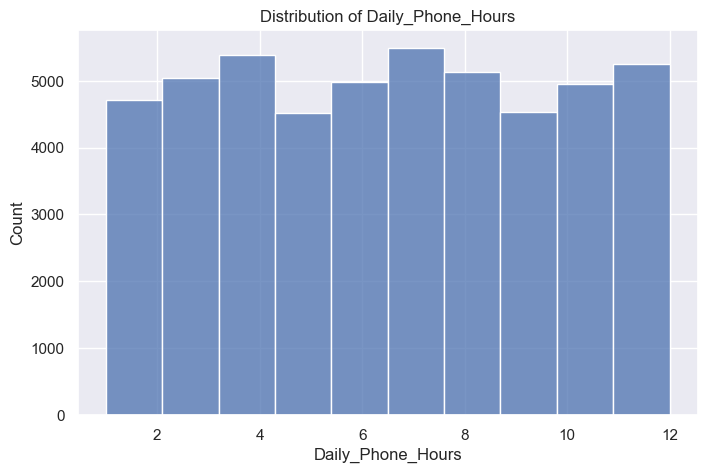

In [34]:
#Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Phone_Hours'], bins=10)
plt.title("Distribution of Daily_Phone_Hours")
plt.show()

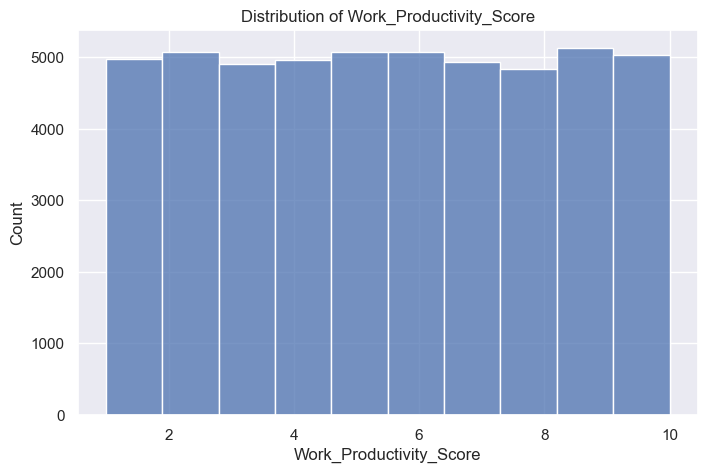

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df['Work_Productivity_Score'], bins=10)
plt.title("Distribution of Work_Productivity_Score")
plt.show()

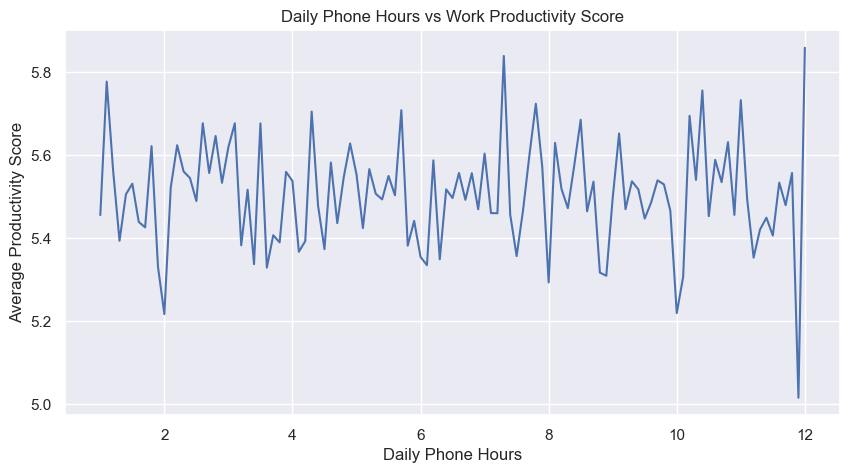

In [12]:
#Bivariate Analysis - Daily_Phone_Hours vs Work_Productivity_Score - its a very big dataset so a lineplot looks cleaner.
plt.figure(figsize=(10,5))
plt.plot(phone_productivity.index, phone_productivity.values)
plt.title("Daily Phone Hours vs Work Productivity Score")
plt.xlabel("Daily Phone Hours")
plt.ylabel("Average Productivity Score")
plt.show()

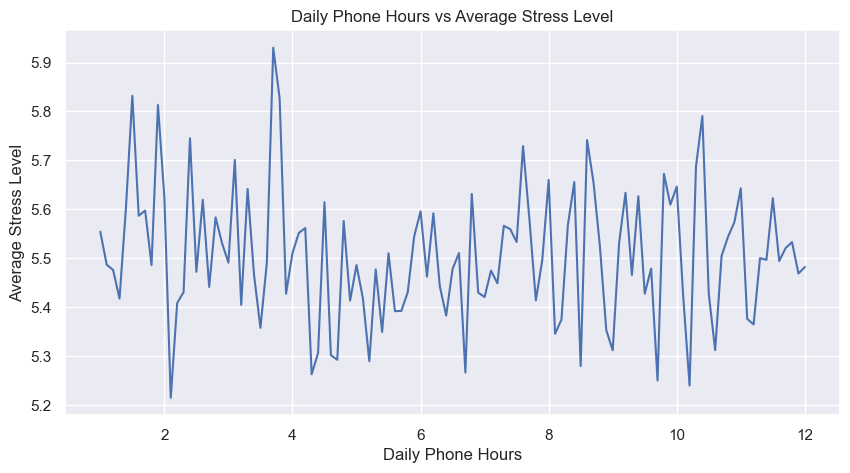

In [19]:
#Bivariate Analysis - Daily_Phone_Hours vs Stress_Level
phone_stress = df.groupby('Daily_Phone_Hours')['Stress_Level'].mean().sort_index()

plt.figure(figsize=(10,5))
plt.plot(phone_stress.index, phone_stress.values)
plt.title("Daily Phone Hours vs Average Stress Level")
plt.xlabel("Daily Phone Hours")
plt.ylabel("Average Stress Level")
plt.grid(True)
plt.show()

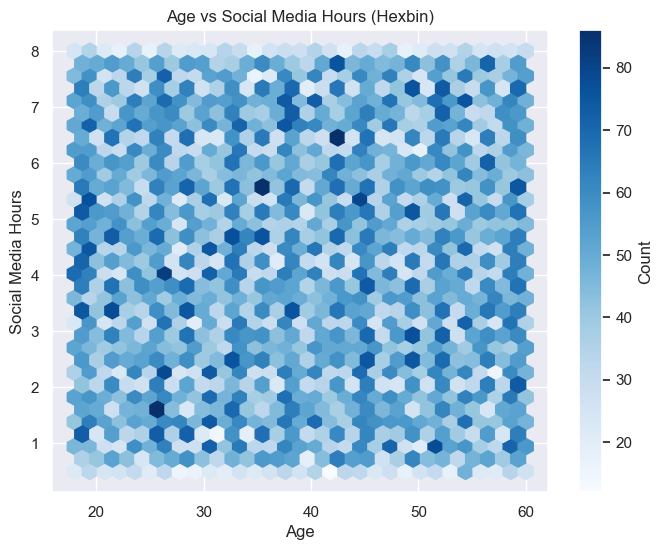

In [25]:
#the dataset is huge so the scatterplots don't really work well. So, instead I used Hexabin plot.
#Age vs Social_Media_hours relationship
plt.figure(figsize=(8,6))
plt.hexbin(df['Age'], df['Social_Media_Hours'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title("Age vs Social Media Hours (Hexbin)")
plt.xlabel("Age")
plt.ylabel("Social Media Hours")
plt.show()

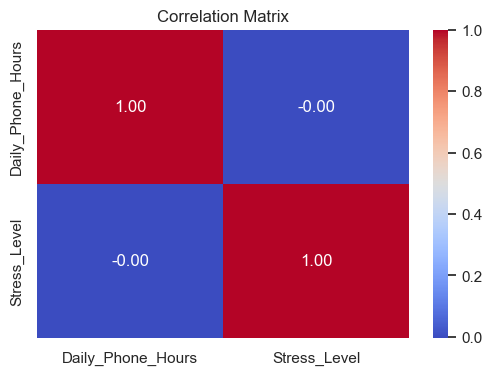

In [28]:
#Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(df[['Daily_Phone_Hours', 'Stress_Level']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

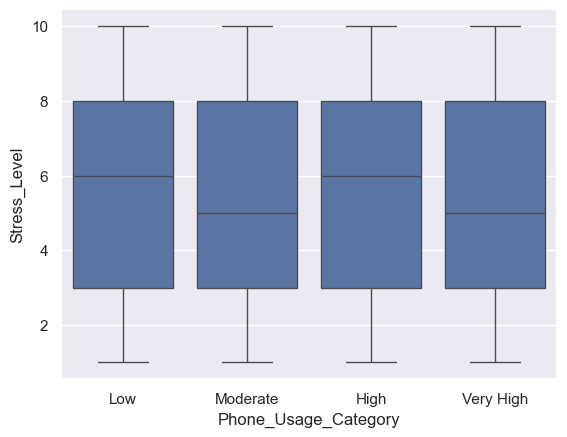

In [31]:
#Categorical Analysis
df['Phone_Usage_Category'] = pd.cut(df['Daily_Phone_Hours'], bins=[0,3,6,9,12], labels=['Low','Moderate','High','Very High'])
sns.boxplot(x='Phone_Usage_Category', y='Stress_Level', data=df)
plt.show()